<a href="https://colab.research.google.com/github/naorJR/IP-Labs/blob/ortra/Lab%204/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <center> Lab 4 – Image Filtering
 

Student IDs: 301613501, 208560086

**Mount to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Change working directory to lab folder**

In [2]:
%cd '/content/drive/My Drive/IP Labs/4'
import os
path = os.getcwd() 
print('path: ' + path)

/content/drive/My Drive/IP Labs/4
path: /content/drive/My Drive/IP Labs/4


**Import the necessary libraries for Lab 4:**

In [3]:
%matplotlib inline 
import numpy as np
from numpy import fft 
import cv2
import matplotlib.pylab as plt
from skimage import transform,io,filters
from skimage.filters import unsharp_mask
from scipy import signal,ndimage

Load and display an image of your choice as a **grayscale** image:

Image shape: (360, 540)
Image data type: uint8


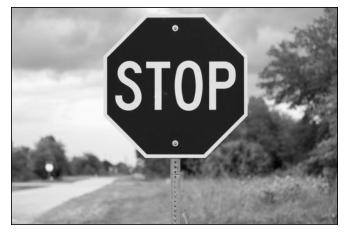

In [6]:
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage import transform,io,color

img = color.rgb2gray(io.imread('stopsign.jpeg'))
img = img_as_ubyte(img)
print ('Image shape: {}\nImage data type: {}'.format(img.shape,img.dtype))
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()

#### **Follow the instructions in each section:**

___
### Part 1 – DFT Properties
___

Use the supplied function *dft_demo()* :

In [7]:
def dft_demo():
    # Demonstration of effect of the "fftshift" command on the amplitude and on the spectrum of the image.
    #-----------------------------------------------------------------------------------------------------#
    N1 = 100; N2=100; M1=20; M2=20
    A = np.zeros([N1,N2])
    A[(N1-M1)//2:(N1+M1)//2,(N2-M2)//2:(N2+M2)//2]=255
    B = np.fft.fft2(A)
    log_magnitude_B= 20*np.log(np.abs(B)+1) # add 1 - in order to prevent log(0)
    B_fftshift=np.fft.fftshift(B)
    log_magnitude_B_fftshift= 20*np.log(np.abs(B_fftshift)+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 8))
    ax = axes.ravel()
    ax[0].imshow(A, cmap='gray')
    ax[0].set_title('The original image'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B, cmap='gray')
    ax[1].set_title('|DFT(a)| [dB]')
    ax[2].imshow(log_magnitude_B_fftshift, cmap='gray')
    ax[2].set_title('|DFT(a)| [dB] + fftshift')
    plt.tight_layout()
    
    # Linearity - 3 demonstrations (two horizontal boxes, two vertical boxes and four boxes)
    #----------------------------------------------------------------------------------------------------#
    # Two horizontal boxes
    delta=40
    A2_hor=np.zeros([N1,N2])
    A2_hor[(N1-M1)//2:(N1+M1)//2,(N2-delta-M2)//2:(N2-delta+M2)//2]=255
    A2_hor[(N1-M1)//2:(N1+M1)//2,(N2+delta-M2)//2:(N2+delta+M2)//2]=255
    B2_hor=np.fft.fft2(A2_hor)
    B2_hor_magnitude = 20*np.log(np.abs(np.fft.fftshift(B2_hor))+1)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A, cmap='gray')
    ax[0].set_title('One box'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B_fftshift, cmap='gray')
    ax[1].set_title('|DFT{One box}| [dB]')
    ax[2].imshow(A2_hor, cmap='gray')
    ax[2].set_title('Two horizontal boxes'), ax[2].axis('off')
    ax[3].imshow(B2_hor_magnitude, cmap='gray')
    ax[3].set_title('|DFT{Two horizontal boxes}|[dB]')
    plt.tight_layout()
    
    # Two vertical boxes
    A2_ver=np.zeros([N1,N2])
    A2_ver[(N1-delta-M1)//2:(N1-delta+M1)//2,(N2-M2)//2:(N2+M2)//2]=255
    A2_ver[(N1+delta-M1)//2:(N1+delta+M1)//2,(N2-M2)//2:(N2+M2)//2]=255
    B2_ver=np.fft.fft2(A2_ver)
    B2_ver_magnitude = 20*np.log(np.abs(np.fft.fftshift(B2_ver))+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A2_ver, cmap='gray')
    ax[0].set_title('Two vertical boxes'), ax[0].axis('off')
    ax[1].imshow(B2_ver_magnitude, cmap='gray')
    ax[1].set_title('|DFT{Two vertical boxes}|[dB]')
    plt.tight_layout()
    
    # Four boxes
    A4=np.zeros([N1,N2])
    A4[(N1-delta-M1)//2:(N1-delta+M1)//2,(N2-delta-M2)//2:(N2-delta+M2)//2]=255
    A4[(N1+delta-M1)//2:(N1+delta+M1)//2,(N2-delta-M2)//2:(N2-delta+M2)//2]=255
    A4[(N1-delta-M1)//2:(N1-delta+M1)//2,(N2+delta-M2)//2:(N2+delta+M2)//2]=255
    A4[(N1+delta-M1)//2:(N1+delta+M1)//2,(N2+delta-M2)//2:(N2+delta+M2)//2]=255
    B4=np.fft.fft2(A4)
    B4_magnitude = 20*np.log(np.abs(np.fft.fftshift(B4))+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A4, cmap='gray')
    ax[0].set_title('Four boxes'), ax[0].axis('off')
    ax[1].imshow(B4_magnitude, cmap='gray')
    ax[1].set_title('|DFT{Four boxes}|[dB]')
    plt.tight_layout()
    
    # Scaling (reduction and enlargement)
    #----------------------------------------------------------------------------------------------------#
    # Reduction
    M1_small=10; M2_small=10
    A_small = np.zeros([N1,N2])
    A_small[(N1-M1_small)//2:(N1+M1_small)//2,(N2-M2_small)//2:(N2+M2_small)//2]=255
    B_small = np.fft.fft2(A_small)
    log_magnitude_B_small= 20*np.log(np.abs(np.fft.fftshift(B_small))+1)
    
    # Enlargement
    M1_large=40; M2_large=40
    A_large = np.zeros([N1,N2])
    A_large[(N1-M1_large)//2:(N1+M1_large)//2,(N2-M2_large)//2:(N2+M2_large)//2]=255
    B_large = np.fft.fft2(A_large)
    log_magnitude_B_large= 20*np.log(np.abs(np.fft.fftshift(B_large))+1)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A_small, cmap='gray')
    ax[0].set_title('Reduced image'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B_small, cmap='gray')
    ax[1].set_title('|DFT{Reduced A}| [dB]')
    ax[2].imshow(A_large, cmap='gray')
    ax[2].set_title('Enlarged image'), ax[2].axis('off')
    ax[3].imshow(log_magnitude_B_large, cmap='gray')
    ax[3].set_title('|DFT{Enlarged A}|[dB]')
    plt.tight_layout()
    
    # Rotation
    #----------------------------------------------------------------------------------------------------#
    theta = 45 #in degrees
    A_rotate = transform.rotate(A, angle=theta)
    B_rotate = np.fft.fft2(A_rotate)
    log_magnitude_B_rotate= 20*np.log(np.abs(np.fft.fftshift(B_rotate))+1)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    ax = axes.ravel()
    ax[0].imshow(A_rotate, cmap='gray')
    ax[0].set_title('Rotated image'), ax[0].axis('off')
    ax[1].imshow(log_magnitude_B_rotate, cmap='gray')
    ax[1].set_title('|DFT{Rotated A}|[dB]')
    plt.tight_layout()

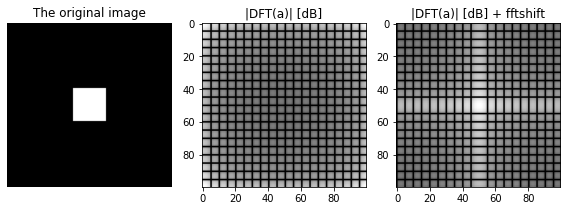

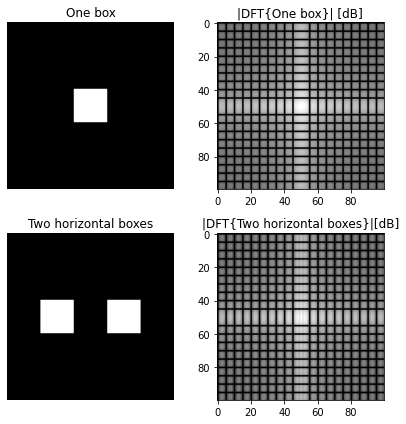

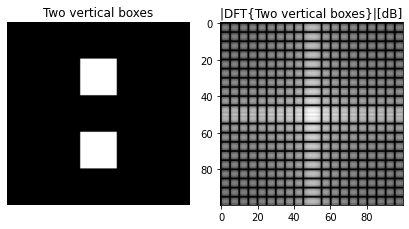

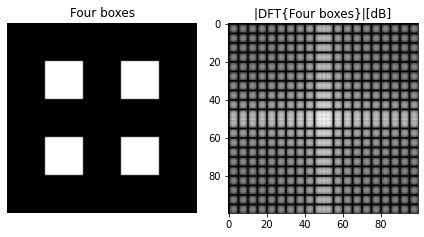

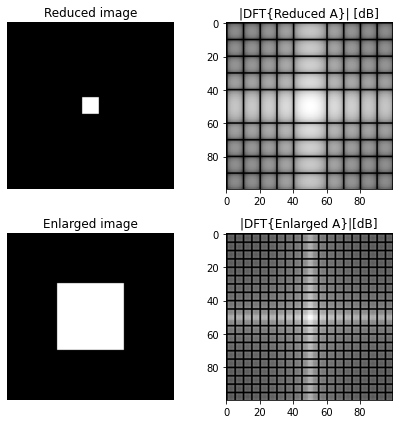

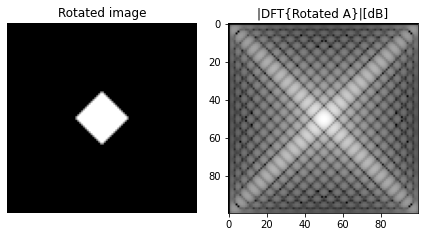

In [8]:
dft_demo()

* Observe the following properties and demonstrations from the *dft_demo()*:
  * fftshift command.
  * Linearity.
  * Scaling.
  * Rotation.
  
**1. Add a short explanation of each of the observations above.**

Insert your explanation here

#### Answer 1
---
**fftshift** - The fftshift function is a utility function that rearranges the frequency components of a discrete Fourier transform (DFT) so that the zero frequency component is at the center of the spectrum. In the demo above we can see easily how this function shifts the "DC" components from the margines to the center. One more thing that stands out is the the duplication and the conjugate properties of the DFT.

**Linearity** - Here, we can see from the center of the spectrum that the basis image of the lower frequencies is devided by the number of rectengulars. 

**Scaling** - We can see the DFT (inverse ration) scaling property by this demo. when the original image scalled up, the DFT reduced. and the same for the other direction.

**Rotation** - As we learned in the class, the DFT rotated by the same angle of the original image.

---

**2. Generate the DFT transform of the image of your choice.** \\
  Show the 3 following plots: Your image, the regular transformation without *fftshift* and transformation with the *fftshift* function.

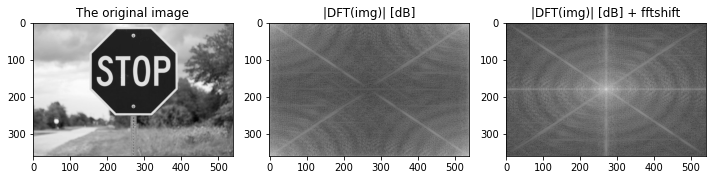

In [9]:
ft = fft.fft2(img)
log_mag_ft = 20*np.log(np.abs(ft)+1) # add 1 - in order to prevent log(0)

ft_shift = fft.fftshift(ft)
log_mag_ft_shift = 20*np.log(np.abs(ft_shift)+1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax = ax.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('The original image'), ax[0].axis('on')
ax[1].imshow(log_mag_ft, cmap='gray')
ax[1].set_title('|DFT(img)| [dB]')
ax[2].imshow(log_mag_ft_shift, cmap='gray')
ax[2].set_title('|DFT(img)| [dB] + fftshift')
plt.tight_layout()
plt.show()

**3. Test the following properties on your image and show the effects on its DFT:**

  * Scaling: factors - **½ and 2** 
  * Rotation: by **30 and 45 degrees**   
  
__Notes__: 
1.      for your image the scaling property should be implemented differently than in the demo (you can use the function *transform.rescale*).
2.   Use zero padding as needed prior to DFT computations.


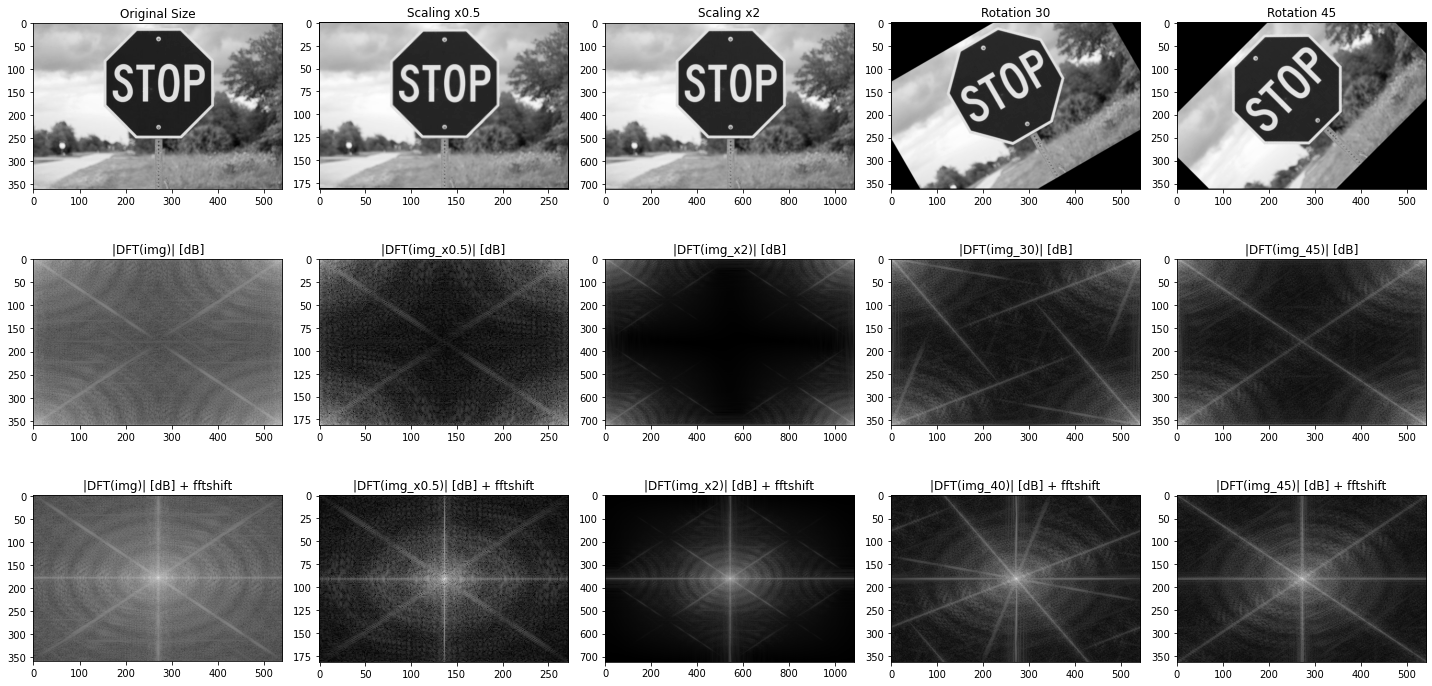

In [10]:
img_width = img.shape[0]
img_height = img.shape[1]



img_fact2x0 = np.pad(transform.resize(img, (2*img_width, 2*img_height)), pad_width=1)
img_fact0x5 = np.pad(transform.resize(img, (0.5*img_width, 0.5*img_height)), pad_width=1)
img_rot30 = np.pad(transform.rotate(img, 30), pad_width=1)
img_rot45 = np.pad(transform.rotate(img, 45), pad_width=1)

img_fact2x0_ft = fft.fft2(img_fact2x0)
img_fact0x5_ft = fft.fft2(img_fact0x5)
img_rot30_ft = fft.fft2(img_rot30)
img_rot45_ft = fft.fft2(img_rot45)

log_magnitude_img_fact2x0_ft = 20*np.log(np.abs(img_fact2x0_ft)+1)
log_magnitude_img_fact0x5_ft = 20*np.log(np.abs(img_fact0x5_ft)+1)
log_magnitude_img_rot30_ft = 20*np.log(np.abs(img_rot30_ft)+1)
log_magnitude_img_rot45_ft = 20*np.log(np.abs(img_rot45_ft)+1)
  
img_fact2x0_ft_shift = 20*np.log(np.abs(fft.fftshift(img_fact2x0_ft))+1)
img_fact0x5_ft_shift = 20*np.log(np.abs(fft.fftshift(img_fact0x5_ft))+1)
img_rot30_ft_shift = 20*np.log(np.abs(fft.fftshift(img_rot30_ft))+1)
img_rot45_ft_shift = 20*np.log(np.abs(fft.fftshift(img_rot45_ft))+1)

fig1, ax1 = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
ax1 = ax1.ravel()


ax1[0].imshow(img, cmap='gray')
ax1[0].set_title('Original Size'), ax[0].axis('on')
ax1[1].imshow(img_fact0x5, cmap='gray')
ax1[1].set_title('Scaling x0.5')
ax1[2].imshow(img_fact2x0, cmap='gray')
ax1[2].set_title('Scaling x2')
ax1[3].imshow(img_rot30, cmap='gray')
ax1[3].set_title('Rotation 30')
ax1[4].imshow(img_rot45, cmap='gray')
ax1[4].set_title('Rotation 45')

ax1[5].imshow(log_mag_ft, cmap='gray')
ax1[5].set_title('|DFT(img)| [dB]'), ax[0].axis('on')
ax1[6].imshow(log_magnitude_img_fact0x5_ft, cmap='gray')
ax1[6].set_title('|DFT(img_x0.5)| [dB]')
ax1[7].imshow(log_magnitude_img_fact2x0_ft, cmap='gray')
ax1[7].set_title('|DFT(img_x2)| [dB]')
ax1[8].imshow(log_magnitude_img_rot30_ft, cmap='gray')
ax1[8].set_title('|DFT(img_30)| [dB]')
ax1[9].imshow(log_magnitude_img_rot45_ft, cmap='gray')
ax1[9].set_title('|DFT(img_45)| [dB]')

ax1[10].imshow(log_mag_ft_shift, cmap='gray')
ax1[10].set_title('|DFT(img)| [dB] + fftshift'), ax[0].axis('on')
ax1[11].imshow(img_fact0x5_ft_shift, cmap='gray')
ax1[11].set_title('|DFT(img_x0.5)| [dB] + fftshift')
ax1[12].imshow(img_fact2x0_ft_shift, cmap='gray')
ax1[12].set_title('|DFT(img_x2)| [dB] + fftshift')
ax1[13].imshow(img_rot30_ft_shift, cmap='gray')
ax1[13].set_title('|DFT(img_40)| [dB] + fftshift')
ax1[14].imshow(img_rot45_ft_shift, cmap='gray')
ax1[14].set_title('|DFT(img_45)| [dB] + fftshift')

plt.tight_layout()
plt.show()





Explain your results here.

#### Answer 2
---
First, we'd like to noteice that it is much easy to analyze the results after the fft shifting. 

Our original image have a symetric octagon in the center, so the 2 major thisgs that stand out from this demonstration are
1. We have 8 rays that reprecent the main shape.
2. The DFT is also symetric like the shape in the original image.

We can also say that the scaling property of the DFT is conspicuous, compared to the original image.

As a result of our uniqe shape in the image, we can se that it is not very easy to recognize the 45 degrees rotation, while in the the 30 degrees the symetricity of the DFT is broken (because the angle doesn't match the shape angle).

---

**4. Write a function called *mag_phase_exchange(img1,img2)*.**

*   Your function should compute the 2D DFTs of both inpute images, and reconstruct new images *img1_ex*, *img2_ex*, through exchanging the computed DFT magnitudes and phases.
*   Specifically: 

>> Retrieve the magnitudes and phases of the DFTs of the inputs images. \\
>> Generate DFT representations of the modified images, through exchanging their magnitudes and phases \\
(i.e., img1_ex <- mag1 + phase2, img2_ex <- mag2 + phase1). \\
>> Reconstruct img1_ex, img2_ex using IDFT. \\

__Notes__: 

1.   Both of the images need to be with the same shape. Resize or crop one of the images if it is necessary.

2.   You may need the functions *numpy.abs* and *numpy.angle*



In [12]:
def mag_phase_exchange(img1,img2):
  
  img1r = transform.resize(img1, (500, 500))
  img2r = transform.resize(img2, (500, 500))
  
  ft1 = fft.fft2(img1r)
  ft2 = fft.fft2(img2r)

  mag1 = np.abs(ft1)
  phase1 = np.angle(ft1)

  mag2 = np.abs(ft2)
  phase2 = np.angle(ft2)

  img1_ex = np.abs(fft.ifft2(mag1 * np.exp(1j * phase2)))
  img2_ex = np.abs(fft.ifft2(mag2 * np.exp(1j * phase1)))

  return img1_ex, img2_ex

*   Test your function on 2 images of your choice - display both original and manipulated images. What can be said about the importance of both magnitude and phase of natural images? 


In [13]:
img1 = color.rgb2gray(io.imread('cat.jpg'))
img1 = img_as_ubyte(img1)
print ('Image 1\n  shape: {}\n  dtype: {}'.format(img1.shape,img1.dtype))
img2 = color.rgb2gray(io.imread('wall.jpg'))
img2 = img_as_ubyte(img2)
print ('\nImage 2\n  shape: {}\n  dtype: {}'.format(img2.shape,img2.dtype))

Image 1
  shape: (2720, 4106)
  dtype: uint8

Image 2
  shape: (797, 1205)
  dtype: uint8


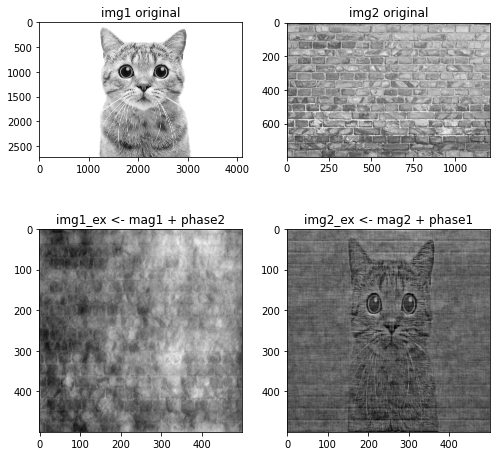

In [14]:
img1_ex, img2_ex = mag_phase_exchange(img1,img2)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax = ax.ravel()

ax[0].imshow(img1, cmap='gray')
ax[0].set_title('img1 original'), ax[0].axis('on')
ax[1].imshow(img2, cmap='gray')
ax[1].set_title('img2 original')
ax[2].imshow(img1_ex, cmap='gray')
ax[2].set_title('img1_ex <- mag1 + phase2')
ax[3].imshow(img2_ex, cmap='gray')
ax[3].set_title('img2_ex <- mag2 + phase1')

plt.tight_layout()
plt.show()

In [15]:
img1 = img_as_ubyte(io.imread('cat.jpg'))
print ('Image 1\n  shape: {}\n  dtype: {}'.format(img1.shape,img1.dtype))
img2 = img_as_ubyte(io.imread('wall.jpg'))
print ('\nImage 2\n  shape: {}\n  dtype: {}'.format(img2.shape,img2.dtype))

Image 1
  shape: (2720, 4106, 3)
  dtype: uint8

Image 2
  shape: (797, 1205, 3)
  dtype: uint8


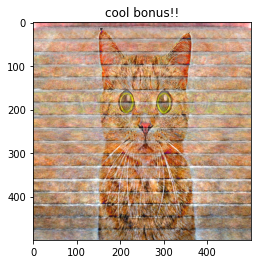

In [17]:
_, img2_ex = mag_phase_exchange(img1,img2)
plt.imshow(img2_ex)
plt.title('cool bonus!!')
plt.show()

Write your answers here.

#### Answer 3
---
In a similar way to the material we learned in class, the phase is much more dominante. We can see that in our demonstration above, while we took the phase of image 2 and put it on the magnitude of image 1. There is no visual signs of the stop sign from the original image 1.

---



___
### Part 2 – Convolution and Image Filtering
___

**1. In this section you will implement an efficient convolution compution using vecorization.**


*   Write a function called *unfold_image(img, kernel_shape)*. \\
Assume a 2D convolution kernel of size *K x K*. The function tranforms an H x W image into a matrix *M* of dimensions: *K^2 x (H-K+1)(W-K+1)*, \\
such that every colum in *M* is a **column stacked image patch** corresponding 
to each one of the kernel positions during convolution. \\

For example, assume a *16x16* image, to be filtered using a *3x3* kernel. \\
The resulting matrix is of size *3^2 x (16-3+1)(16-3+1) = 9 x 196*, as there are 196 kernel positions during the convolution.



In [18]:
def unfold_image(img, kernel_shape):
    k_w, k_h = kernel_shape
    w, h = img.shape
    
    #create the wanted unfolded image shape
    unfolded_image = np.empty((k_h * k_w, (h - k_h + 1) * (w - k_w + 1)))
    
    for i in range(k_h):
        for j in range(k_w):
            unfolded_image[i * k_w + j, :] = img[i:i + w - k_w + 1, j:j + h - k_h + 1].flatten()
    
    return unfolded_image

*   Write a function called *my_convolve2d(img,kernel)*. \\
Your function should compute the convolution through the following steps:

>> Generate a corresponding image matrix *M* (the unfolded image) using the function from the previous section. \\
>> Transform the *K x K* convolution *kernel* to a *K^2 x 1* row vector *kernel_row*. \\
>> Perform matrix multilplication: *img_filtered_flattened = kernel_row * M*. \\
>> Acquire the resulting image *img_filtered* through reshaping.






In [19]:
def my_convolve2d(img,kernel):
  h,w = img.shape
  k = kernel.shape[0]
  k_r = kernel.reshape(1, kernel.size)

  img_filtered_flattened = k_r @ unfold_image(img, kernel.shape)

  img_filtered = img_filtered_flattened.reshape(h-k+1,w-k+1)
  return img_filtered

*   Test your function! \\
Use the following blur kernel and the reference convolve2d function. \\
Make sure your function produces the same results, both numerically and qualitatively.


In [20]:
def calc_RMS(f, f_hat):
  # Insert your code:
  RMS = np.sqrt(np.mean((f-f_hat)**2))
  return RMS

The RMS error between the reference convolve2d to my_convovle2d: 4.570400595722915e-14



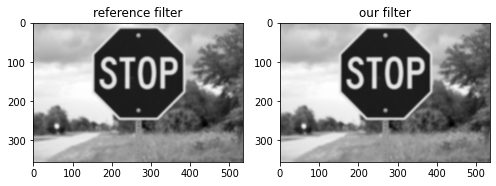

In [29]:
blur_kernel = (1.0/36)*np.ones((6,6))
img_filtered_ref = signal.convolve2d(img,blur_kernel,mode='valid')

img_filtered_our = my_convolve2d(img, blur_kernel)


print("The RMS error between the reference convolve2d to my_convovle2d: {}\n".format(calc_RMS(img_filtered_ref,img_filtered_our)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))
ax = ax.ravel()

ax[0].imshow(img_filtered_ref, cmap='gray')
ax[0].set_title('reference filter'), ax[0].axis('on')
ax[1].imshow(img_filtered_our, cmap='gray')
ax[1].set_title('our filter')

plt.tight_layout()
plt.show()


Explain your results here.
#### Answer 4
---
It is possible to see by the image comparison above that the we got a aimilar visual results as the reference function shows. both of the images have the same size. We also compared our results numiricaly as mentioned above - RMS error between our function and the built in function is ~ 0 (e-14).

---

**2. You will now investigate two methods for image filtering:**

*   Direct method (using convolution, in spatial domain) - which you have already implemented.
*   Indirect method (using DFT, in frequency domain).


*   Write a function called *my_fft_filter2d(img,kernel)*. \\
Your function should compute the filtered image through the following steps:

>> Pad with zeros both image and kernel to desired dimensions (what should they be?) \\
>> Compute 2D DFT of padded image and kernel. \\
>> Perform pointwise multiplication. \\
>> Retrieve filtered image through computing IDFT.

In [22]:
def my_fft_filter2d(img,kernel,mode = 'valid'):
    # Insert your implementaion here
  if kernel.shape[0]%2 == 0 :
      s1,s2 = int(kernel.shape[0]/2)-1,int(kernel.shape[1]/2)-1 # kernel shape is even in example 6x6
  if kernel.shape[0]%2 != 0 :
      s1,s2 = int(kernel.shape[0]/2),int(kernel.shape[1]/2) #  kernel shape is odd in example 5x5
  sz  = tuple([img.shape[0]+kernel.shape[0]-1,img.shape[1]+kernel.shape[1]-1])
  H = np.fft.fft2(kernel, s = sz)
  F = np.fft.fft2(img, s = sz)
  G = F * H
  g = np.abs(np.fft.ifft2(G)) 
  if mode == 'valid':
    img_filtered = g[kernel.shape[0]-1:img.shape[0],kernel.shape[1]-1:img.shape[1]]
  if mode == 'same':
    img_filtered = g[s1:(img.shape[0]+s1),s2:(img.shape[1]+s2)]
  if mode == 'full':
    img_filtered = g[0:(img.shape[0]+kernel.shape[0]-1), 0:(img.shape[1]+kernel.shape[1]-1)] 
  
  return img_filtered

*   Test your function!

Use the previously given blur kernel and the reference convolve2d function. \\
Make sure both methods produce the same results, both numerically and qualitatively.

*   What is purpose of the 'mode' argument in calling *signal.convolve2d*?




The RMS error between convolve2d to my_fft_filter2d 8.627036774327608e-14



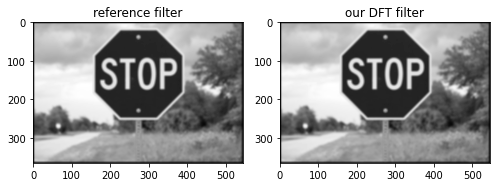

In [31]:
m = 'full'
img_filtered_ref = signal.convolve2d(img, blur_kernel,mode = m)

img_filtered_dft = my_fft_filter2d(img,blur_kernel,mode = m)

print("The RMS error between convolve2d to my_fft_filter2d {}\n".format(calc_RMS(img_filtered_ref,img_filtered_dft)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))
ax = ax.ravel()

ax[0].imshow(img_filtered_ref, cmap='gray')
ax[0].set_title('reference filter'), ax[0].axis('on')
ax[1].imshow(img_filtered_dft, cmap='gray')
ax[1].set_title('our DFT filter')

plt.tight_layout()
plt.show()

Explain your results here.

#### Answer 5
In  the Direct method (using convolution in the spatial domain) we implemented a linear convolution. Now, we want to do the same in the frequency domain. We learned in class that the multiplication between the fft of the image and the fft of the kernel is equal to circular convolution in the spatial domain (and not a linear convolution as we implemented). In order to make that the linear and the circular convolutions will converge, we need to pad the kernel and the image to the size: [image_size + kernel_size - 1] in each axis.

The mode argument defines the output size and shape of the 2D convolusion.
There are 3 options to choose in this mode - full, same and valid.
We implemented the my_fft_filter2d such that it will support all the mode options and we can see by the result that the MSE error is ~ 0 and the images are the same.

**3. Observe the following filters.** \\
    Apply all the filters on your image (you may choose which method to use). \\
    Determine which filters are high pass filters and which are low pass filters.

In [32]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,0.5)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']

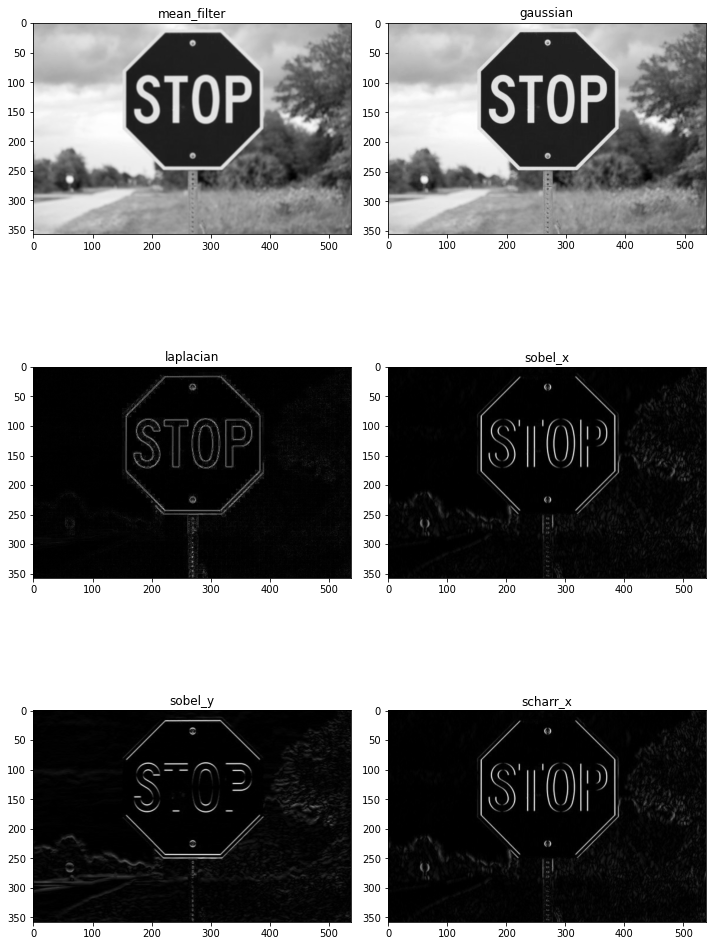

In [33]:
img_arr = []

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
ax = ax.ravel()

for f in range(len(filters)):
  ax[f].imshow(my_fft_filter2d(img,filters[f]), cmap='gray')
  ax[f].set_title(filter_name[f])


plt.tight_layout()
plt.show()

Insert your answers here

#### Answer 6
---
We know that edges are characterized by high frequencies in the image domain. So according to that in our case we can say that:
1. mean_filter - this filter is bluring the edges --> low pass
2. gaussian - this filter is bluring the edges --> low pass (as we expect to see according to the 1-D case)
3. laplacian - this filter passes almost only the edges --> (strong) high pass
4. sobel_x - it seems like this filter passes high frequencies in the x direction (horizontal) and low frequencies in the y directions (vertical)
5. sobel_y - similar to sobel_x but in the oposite directions. --> low pass horizontal and high pass verticaly
6. scharr_x - the filtered image seems very similar to sobel_x filter but a little bit sharper. --> high pass horizontal and low pass verticaly

In order to confirm our explanation, we also attached polts of the filters' DFT below.

---

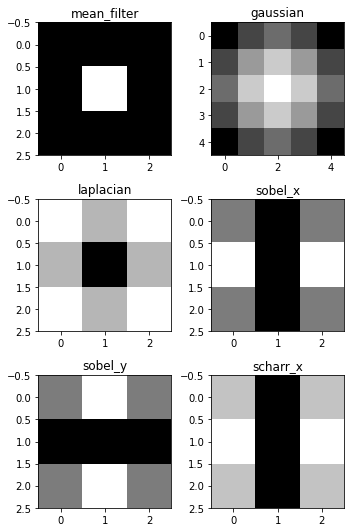

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(5, 7.5))
ax = ax.ravel()
for f in range(len(filters)):
    B = np.fft.fft2(filters[f])
    log_magnitude_B= 20*np.log(np.abs(B)+1) # add 1 - in order to prevent log(0)
    B_fftshift=np.fft.fftshift(B)
    log_magnitude_B_fftshift= 20*np.log(np.abs(B_fftshift)+1)
    ax[f].imshow(log_magnitude_B_fftshift, cmap='gray')
    ax[f].set_title(filter_name[f])
plt.tight_layout()
plt.show()


___
### Part 3 – Unsharp Masking (USM)
___

**1. Use the supplied function *unsharp_masking_demo*.**
*	Test the function with the image of your choice. Optimize lambda1 and lambda2 for your image.
*	Explain the two different sharpening techniques used in the demo and your results.
* Specifically, note that a LPF is used for sharpenning images (Unsharp).

In [62]:
def unsharp_masking_demo(img):
    # Obtain blurred image using convolution in spatial domain
    blur_kernel = (1.0/36)*np.ones((6,6))
    img_blurred = transform.resize(signal.convolve2d(img,blur_kernel),(img.shape[0],img.shape[1]))
    
    # Perform unsharp masking using Laplacian filter 
    lambda1=1.2; lambda2=1.2
    img_laplace = cv2.Laplacian(img,cv2.CV_64F)
    img_enhanced_edges = img-lambda1*img_laplace

    # Perform unsharp masking using the low pass filtered  image  with parameter lambda2. 
    img_unsharp = img+lambda2*(img-img_blurred)

    # Display the results
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    ax = axes.ravel()
    ax[0].imshow(img, vmin=0,vmax=255,cmap='gray')
    ax[0].set_title('Original image'), ax[0].axis('off')
    ax[1].imshow(img_blurred,vmin=0,vmax=255, cmap='gray')
    ax[1].set_title('Blurred image'), ax[1].axis('off')
    ax[2].imshow(img_enhanced_edges, vmin=0,vmax=255, cmap='gray')
    ax[2].set_title('Image after laplacian edge enhancement'), ax[2].axis('off')
    ax[3].imshow(img_unsharp, vmin=0,vmax=255,cmap='gray')
    ax[3].set_title('Image after low pass based unsharp masking'), ax[3].axis('off')
    plt.tight_layout()

Insert your explanation here

#### Answer 7
---
The unsharp_masking_demo function uses 2 different techniques to sharpening our image. 

The first method takes an image and applies strong high pass filter on it, then it substructs this filtered image (multiplied by a factor) from the original images. In bottom line, it takes an image and substruct the high frequencies from it.

The other method takes an image and applies average low pas filter on it, then it substructs this filtered image from the original images and finnaly add it (multiplied by a factor) to the original image. Which means that it takes the original image and add to it the also the high frequency component that was generated by substruc the low frequencies from the original image on the first step.

Since both of the functions actually to the same, the lambdas factors gives similar results when the are on the same size.

---


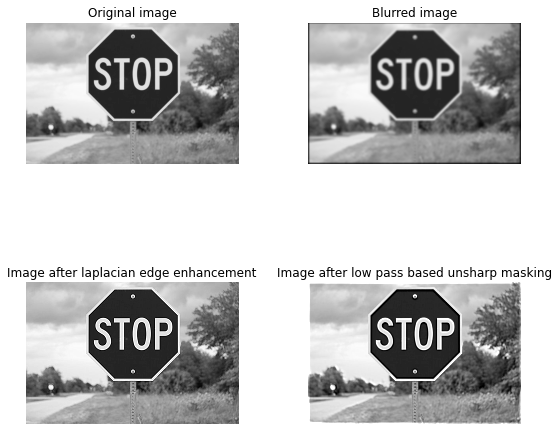

In [64]:
unsharp_masking_demo(img)

**2. Implement unsharp masking using python’s function *skimage.filters.unsharp_mask***

enhanced image = original + amount * (original - blurred)

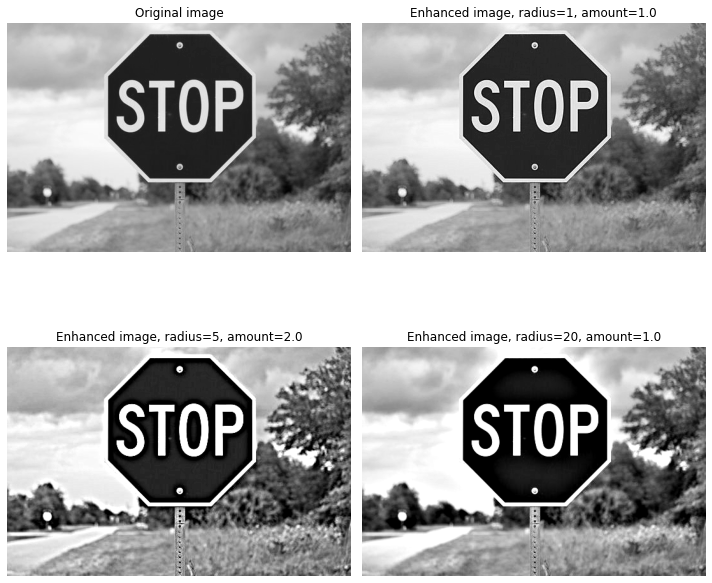

In [65]:
from skimage.filters import unsharp_mask

result_1 = unsharp_mask(img, radius=1, amount=1)
result_2 = unsharp_mask(img, radius=5, amount=2)
result_3 = unsharp_mask(img, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Provide a short explanation

Insert your explanation here

#### Answer 8
---
Unsharp masking is a linear image processing technique which sharpens the image. The sharp details are identified as a difference between the original image and its blurred version. These details are then scaled, and added back to the original image by the following formula:

enhanced image = original + amount * (original - blurred)

we can see that amount parameter is used as the weight of the difference between the original image and the blurred one. Since this function uses Gaussian filter to blure the image, the the radiues input is refer to the sigma of the filter.

In our experiement we can see that as greater the radius (sigma) as sharper the image. But when we increased the anount, we also got well performence eventhough the radius was smaller then the latest image.